In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [22]:
data=pd.read_csv("train.tsv",delimiter="\t")

In [23]:
data.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel


In [24]:

#origin = data['origin']
origin_data = pd.get_dummies(data['origin'])
origin_data.columns = ['German','American','Japanese']
#origin_data.columns = ['German Car', 'American Car','Japanese Car']
origin_data.head()

,German,American,Japanese
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1


In [25]:
data = data.drop(['origin'],axis = 1)
data = data.drop(['car name'],axis = 1)
data.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,0,29.0,4,135.0,84.00,2525.0,16.0,82
1,3,31.9,4,89.0,71.00,1925.0,14.0,79
2,9,19.0,6,156.0,108.0,2930.0,15.5,76
3,11,28.0,4,90.0,75.00,2125.0,14.5,74
4,13,37.7,4,89.0,62.00,2050.0,17.3,81


In [26]:
#data = origin_data.append(data)
data = pd.concat([data,origin_data], axis=1)
data.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,German,American,Japanese
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,0,0
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,0,1,0
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,0,0,1
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,0,0
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,0,0,1


In [27]:

#データを入力データと正解データに分離
train_x = data.values[:,2:11]
train_y = data.values[:,1]

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [29]:
#モデルの作成
model = RandomForestRegressor(n_estimators=100)

In [30]:
#モデルの学習(エラー発生)
model.fit(train_x,train_y)

ValueError: could not convert string to float: '?'

In [31]:
#データに"?"があるためエラーが発生
#train_x[:,2]

In [32]:
#"?"にはデータが存在しないため、全体の平均値で置換

power = []
for i in range(len(train_x)):
    if train_x[i,2]!='?':
        power.append(float(train_x[i,2]))
    

#平均値の算出kf = KFold(n_splits=3)

 
mean_power=np.mean(power)

for i in range(len(train_x)):
    if train_x[i,2]=='?':
        train_x[i,2]=mean_power
    else:
        train_x[i,2]=float(train_x[i,2])
        


In [33]:
#平均二乗誤差
def rmse(y,pred):
    total = 0
    for i in range(len(y)):
        total += (pred[i] - y[i])**2        
        
    total /= len(y) 
    total = total**0.5
    
    return total


In [34]:
kf = KFold(n_splits=10)
#データ分割  cross validation（交差検証）
r_list = []
for train_index, test_index in kf.split(train_x):
    train_x_itr, test_x_itr = train_x[train_index], train_x[test_index]
    train_y_itr, test_y_itr = train_y[train_index], train_y[test_index]
    model = RandomForestRegressor(n_estimators=100)
    model.fit(train_x_itr,train_y_itr) #model training    
    result = model.predict(test_x_itr)
    r_list.append(rmse(test_y_itr,result))
    
print(r_list)
print(np.mean(r_list))

[3.1702560464416765, 4.4137834394088715, 4.025196231241398, 1.8358528808158872, 2.361816927706298, 2.5347433203383667, 3.444865418271079, 2.1165264704227065, 2.8703786335603874, 2.5185145580177544]
2.9291933926224423


In [40]:
importances = model.feature_importances_
data.columns = [
    'id', 'mpg', 'cylinders', 'displacement',
    'horsepower', 'weight', 'acceleration', 'model year',
    'German','American', 'Japanese'
]

In [41]:
from matplotlib import pyplot
feat_labels = data.columns[1:]

In [42]:
indices = np.argsort(importances)[::-1]
for f in range(train_x.shape[1]):
    print("%2d) %-*s %f" %
    (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) cylinders                      0.242939
 2) horsepower                     0.238896
 3) mpg                            0.225817
 4) acceleration                   0.163104
 5) displacement                   0.097060
 6) weight                         0.024129
 7) American                       0.003743
 8) German                         0.002781
 9) model year                     0.001530


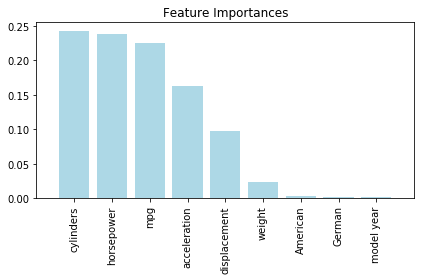

In [43]:
pyplot.title('Feature Importances')
pyplot.bar(
    range(train_x.shape[1]),
    importances[indices],
    color='lightblue',
    align='center'
)
pyplot.xticks(
    range(train_x.shape[1]),
    feat_labels[indices],
    rotation=90
)
pyplot.xlim([-1,train_x.shape[1]])
pyplot.tight_layout()
pyplot.show()


In [ ]:
test_y[['id', 'mpg']].to_csv('./submit.csv', header=False, index=False)